# SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import scanpy.external as sce
import random

In [2]:
adata_pre = sc.read_h5ad("/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/pre_CD8/adata.h5ad")
adata_post = sc.read_h5ad("/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/post_CD8/adata.h5ad")

The data don't need to be preprocessed, as it has already been done [here](https://github.com/rcasalsfr/Master-thesis/tree/main).

In [3]:
adata_pre

AnnData object with n_obs × n_vars = 6319 × 18347
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cluster', 'treatment', 'percent_mito', 'percent_ribo', 'percent_hb', 'RNA_snn_res.0.3', 'seurat_clusters', 'idents', 'celltype.cnd', 'barcode', 'UMAP_1', 'UMAP_2'
    uns: 'celltype.cnd_colors'
    obsm: 'X_umap'

In [4]:
adata_post

AnnData object with n_obs × n_vars = 7120 × 18347
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cluster', 'treatment', 'percent_mito', 'percent_ribo', 'percent_hb', 'RNA_snn_res.0.3', 'seurat_clusters', 'idents', 'celltype.cnd', 'barcode', 'UMAP_1', 'UMAP_2'
    uns: 'celltype.cnd_colors'
    obsm: 'X_umap'

# UMAP VISUALIZATION

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


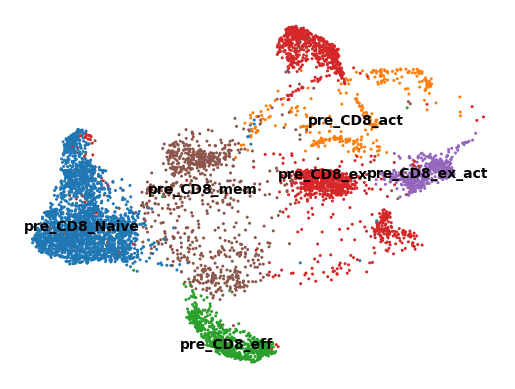

In [5]:
sc.pl.umap(adata_pre, color = 'celltype.cnd', legend_loc = 'on data', title = '', frameon = False)

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


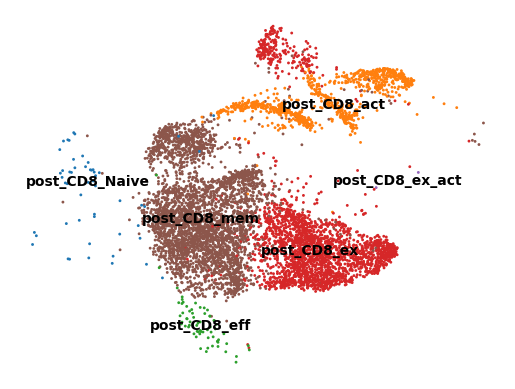

In [6]:
sc.pl.umap(adata_post, color = 'celltype.cnd', legend_loc = 'on data', title = '', frameon = False)

# DATA PREPARATION

In [7]:
sc.pp.normalize_total(adata_pre, target_sum = 1e6)  
sc.pp.normalize_total(adata_post, target_sum = 1e6)  

In [8]:
sce.pp.magic(adata_pre, name_list = 'all_genes')
sce.pp.magic(adata_post, name_list = 'all_genes')

/Users/claudiavicentecomorera/.local/lib/python3.11/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


  Running MAGIC with `solver='exact'` on 18347-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/Users/claudiavicentecomorera/.local/lib/python3.11/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


  Running MAGIC with `solver='exact'` on 18347-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


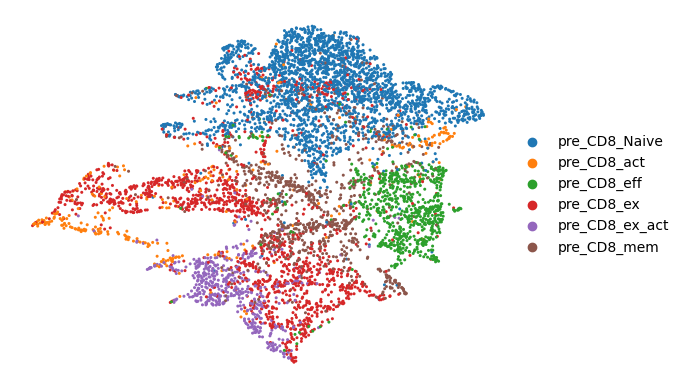

In [9]:
sc.pp.neighbors(adata_pre)
sc.tl.umap(adata_pre)
sc.pl.umap(adata_pre, color = 'celltype.cnd', title = '', frameon = False)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


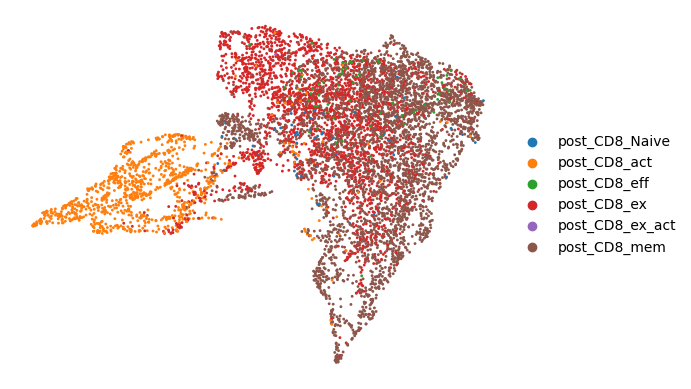

In [10]:
sc.pp.neighbors(adata_post)
sc.tl.umap(adata_post)
sc.pl.umap(adata_post, color = 'celltype.cnd', title = '', frameon = False)

# DATA STORING FOR rFASTCORMICS

In [11]:
t_data_pre = adata_pre.to_df().transpose()
t_data_pre.to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/pre_CD8/data_titc.csv')

t_data_post = adata_post.to_df().transpose()
t_data_post.to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/post_CD8/data_titc.csv')

In [12]:
df_clust_pre = adata_pre.obs['celltype.cnd'].to_frame().rename(columns={'celltype.cnd': 'Cluster_Label'}).rename_axis('Cell_Name')
df_clust_pre.to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/pre_CD8/clabs_titc.csv')

df_clust_post = adata_post.obs['celltype.cnd'].to_frame().rename(columns={'celltype.cnd': 'Cluster_Label'}).rename_axis('Cell_Name')
df_clust_post.to_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/post_CD8/clabs_titc.csv')